Jireh M. Dominguez BSCS 1 Discrete Math 2 Group 3 Lecture 3

# Directed Graphs(Diagraphs)
A directed graph, or digraph, consists of a set of vertices connected by edges where the edges have a direction associated with them. This means that each edge has a start and an end vertex.

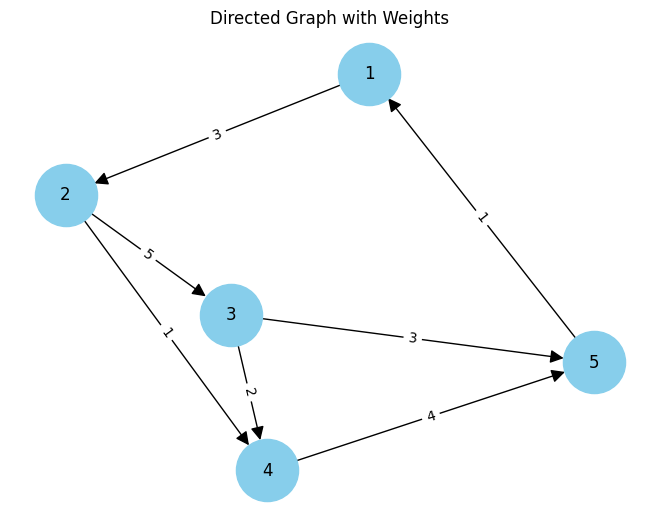

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_nodes_from([
    (1, {"name": "A"}),
    (2, {"name": "B"}),
    (3, {"name": "C"}),
    (4, {"name": "D"}),
    (5, {"name": "E"})
])

G.add_edges_from([
    (1, 2, {"weight": 3}),
    (2, 3, {"weight": 5}),
    (3, 4, {"weight": 2}),
    (4, 5, {"weight": 4}),
    (5, 1, {"weight": 1}),
    (2, 4, {"weight": 1}),
    (3, 5, {"weight": 3})
])

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph with Weights')
plt.show()


# Simple Graphs(Diagraphs)
A simple graph is an undirected graph with no self-loops or multiple edges between the same pair of vertices.

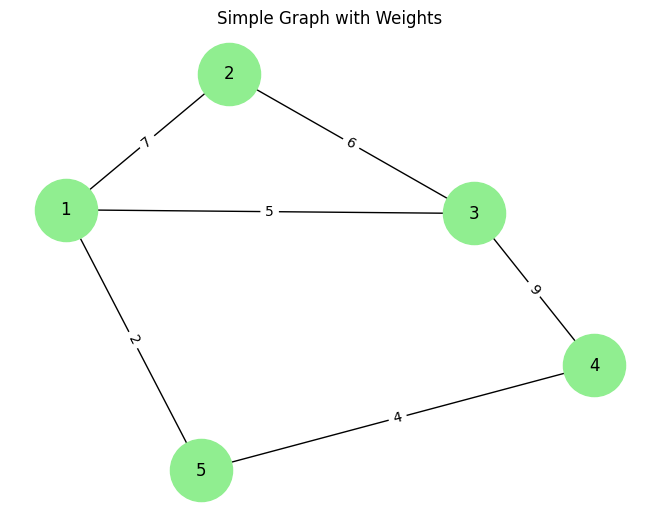

In [11]:
G = nx.Graph()

G.add_nodes_from([
    (1, {"type": "A"}),
    (2, {"type": "A"}),
    (3, {"type": "B"}),
    (4, {"type": "B"}),
    (5, {"type": "C"})
])

G.add_edges_from([
    (1, 2, {"weight": 7}),
    (1, 3, {"weight": 5}),
    (2, 3, {"weight": 6}),
    (3, 4, {"weight": 9}),
    (4, 5, {"weight": 4}),
    (1, 5, {"weight": 2})
])

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Simple Graph with Weights')
plt.show()


# Complete Graphs
A complete graph is a graph in which there is an edge between every pair of vertices.

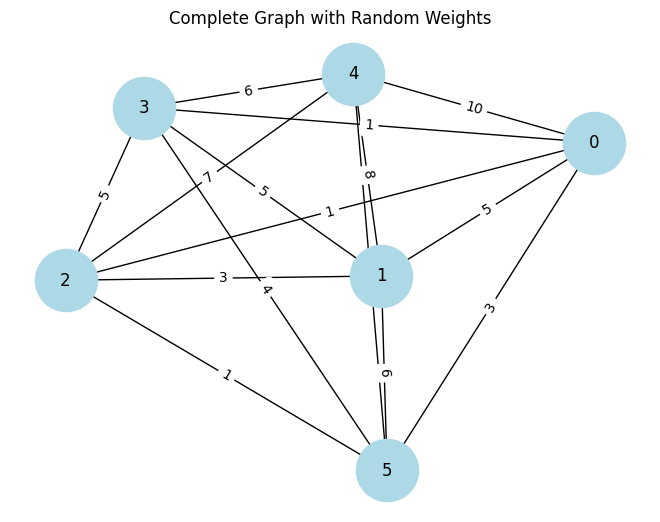

In [14]:
G = nx.complete_graph(6)

import random
for (u, v) in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Complete Graph with Random Weights')
plt.show()



# Bipartite Graphs
A bipartite graph is a graph whose vertices can be divided into two disjoint sets such that no two vertices within the same set are adjacent.

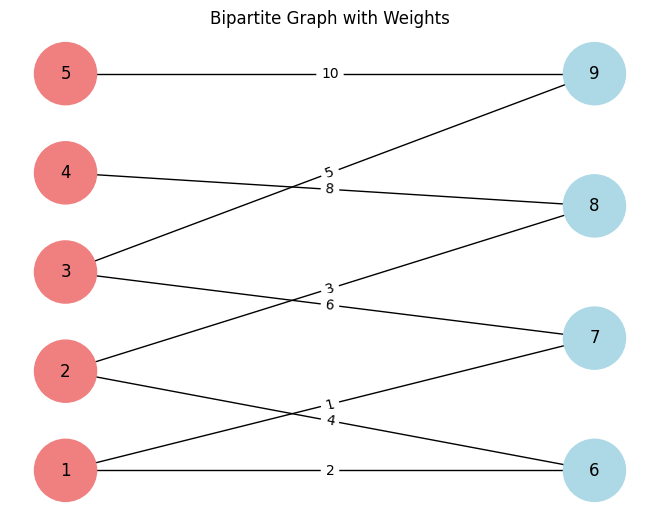

In [16]:
B = nx.Graph()

B.add_nodes_from([1, 2, 3, 4, 5], bipartite=0)  # Set 1
B.add_nodes_from([6, 7, 8, 9], bipartite=1)    # Set 2

B.add_edges_from([
    (1, 6, {"weight": 2}),
    (2, 6, {"weight": 4}),
    (3, 7, {"weight": 6}),
    (4, 8, {"weight": 8}),
    (5, 9, {"weight": 10}),
    (1, 7, {"weight": 1}),
    (2, 8, {"weight": 3}),
    (3, 9, {"weight": 5})
])

pos = nx.bipartite_layout(B, nodes=[1, 2, 3, 4, 5])
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw(B, pos, with_labels=True, node_color=['lightcoral' if i in [1, 2, 3, 4, 5] else 'lightblue' for i in B.nodes()], node_size=2000)
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)
plt.title('Bipartite Graph with Weights')
plt.show()


# Subgraphs
A subgraph is a subset of a graph's edges (and associated vertices) that forms a graph.

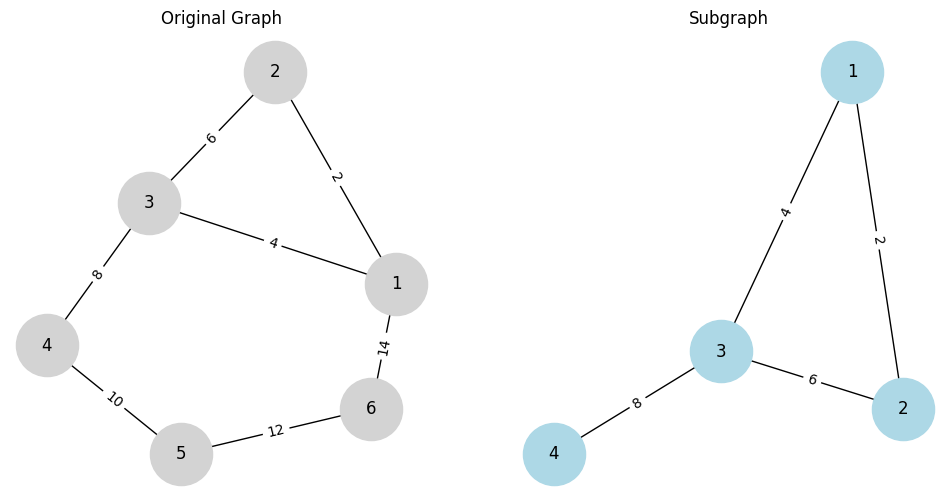

In [17]:
G = nx.Graph()
G.add_edges_from([
    (1, 2, {"weight": 2}),
    (1, 3, {"weight": 4}),
    (2, 3, {"weight": 6}),
    (3, 4, {"weight": 8}),
    (4, 5, {"weight": 10}),
    (5, 6, {"weight": 12}),
    (6, 1, {"weight": 14})
])

nodes = [1, 2, 3, 4]
H = G.subgraph(nodes)

plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Original Graph')

plt.subplot(122)
pos_sub = nx.spring_layout(H)
edge_labels_sub = nx.get_edge_attributes(H, 'weight')
nx.draw(H, pos_sub, with_labels=True, node_color='lightblue', node_size=2000)
nx.draw_networkx_edge_labels(H, pos_sub, edge_labels=edge_labels_sub)
plt.title('Subgraph')
plt.show()


# Degree of a Vertex
The degree of a vertex is the number of edges connected to it.

Degrees of vertices: {1: 3, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2}


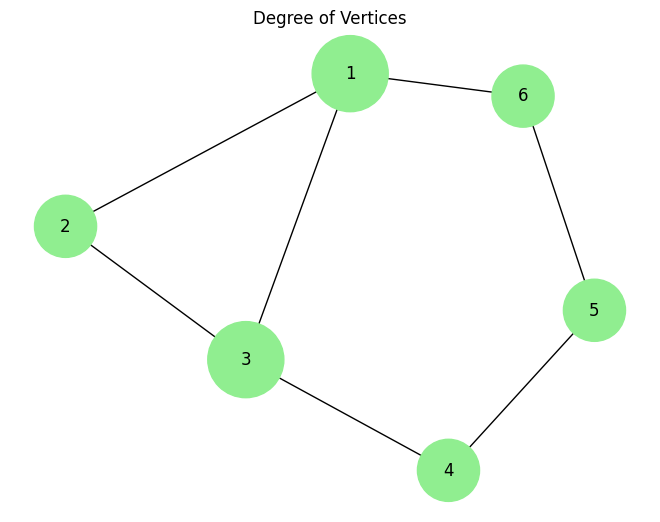

In [18]:
G = nx.Graph()
G.add_edges_from([
    (1, 2, {"weight": 2}),
    (1, 3, {"weight": 4}),
    (2, 3, {"weight": 6}),
    (3, 4, {"weight": 8}),
    (4, 5, {"weight": 10}),
    (5, 6, {"weight": 12}),
    (6, 1, {"weight": 14})
])

degrees = dict(G.degree)
print("Degrees of vertices:", degrees)

node_sizes = [v * 1000 for v in degrees.values()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=node_sizes)
plt.title('Degree of Vertices')
plt.show()


# Traveling in a Graph (Walk, Path, Closed Walk, Circuit, Simple Circuit)


**Walk**:
   - A walk in a graph is a sequence of vertices where consecutive vertices are connected by edges. 
   - It doesn't necessarily have to visit each edge exactly once. 

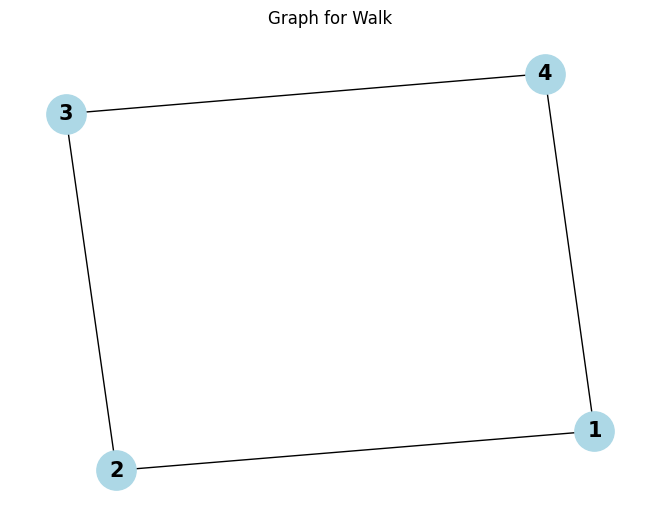

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

G_walk = nx.Graph()
G_walk.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G_walk, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Graph for Walk')
plt.show()


**Path**:
   - A path in a graph is a walk in which no vertices (except possibly the first and last) are repeated.
   - It's a simple walk without revisiting any vertices.

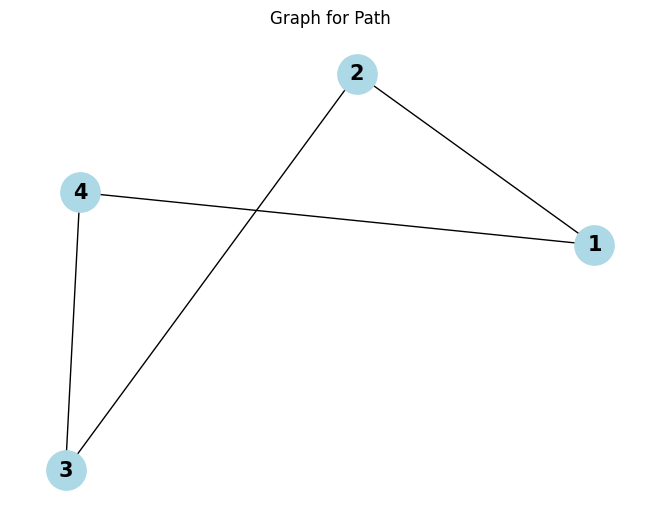

In [22]:
G_path = nx.Graph()
G_path.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G_path, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Graph for Path')
plt.show()


**Closed Walk**:
   - A closed walk is a walk that starts and ends at the same vertex.
   - It forms a loop, where the starting and ending vertices are the same.

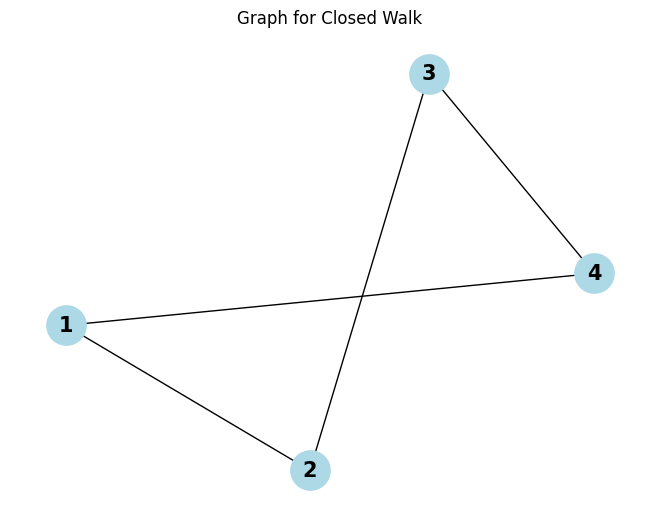

In [23]:
G_closed_walk = nx.Graph()
G_closed_walk.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G_closed_walk, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Graph for Closed Walk')
plt.show()


**Circuit**:
   - A circuit in a graph is a closed walk in which no vertices (except possibly the first and last) are repeated.
   - It forms a loop, and it can visit some vertices more than once, except the first and last vertices which are the same.

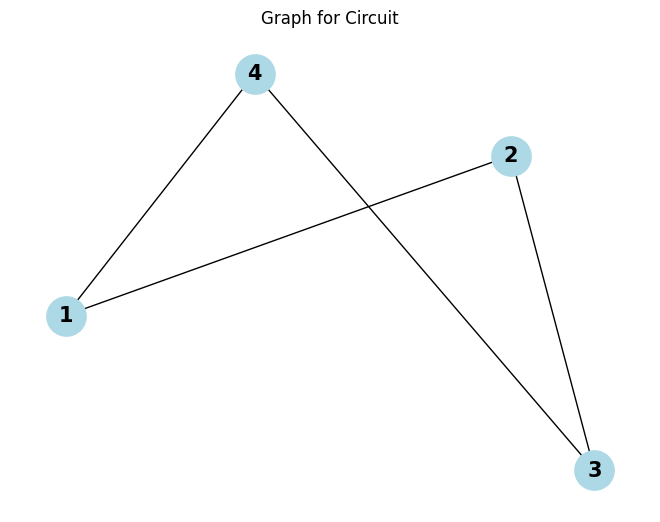

In [24]:
G_circuit = nx.Graph()
G_circuit.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G_circuit, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Graph for Circuit')
plt.show()


**Simple Circuit**:
   - A simple circuit is a circuit that contains at least three vertices and does not repeat any except the first and last.
   - It's a cycle without any repeated vertices (except for the starting and ending vertices).

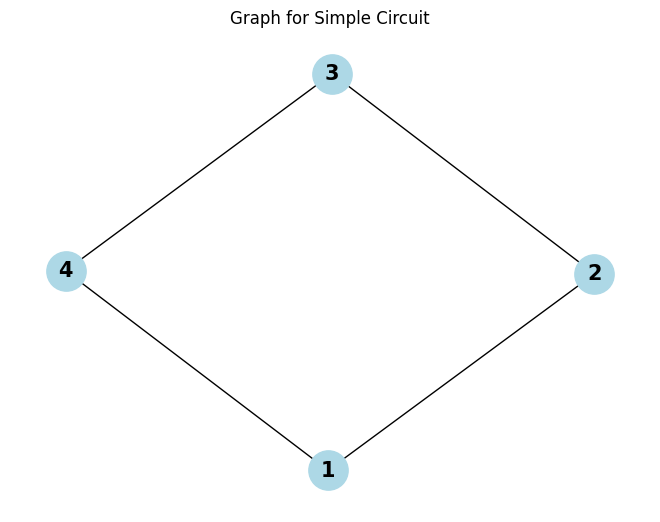

In [25]:
G_simple_circuit = nx.Graph()
G_simple_circuit.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

nx.draw(G_simple_circuit, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Graph for Simple Circuit')
plt.show()


# Connectedness in a Graph (Connected Components, Connected Graph, Eulerian Circuit, Eulerian Trail, Hamiltonian Circuit)

**Connected Components**
- Connected components are subgraphs in which each pair of vertices is connected by a path.
- In a graph, if every vertex is reachable from every other vertex, then the graph has only one connected component.

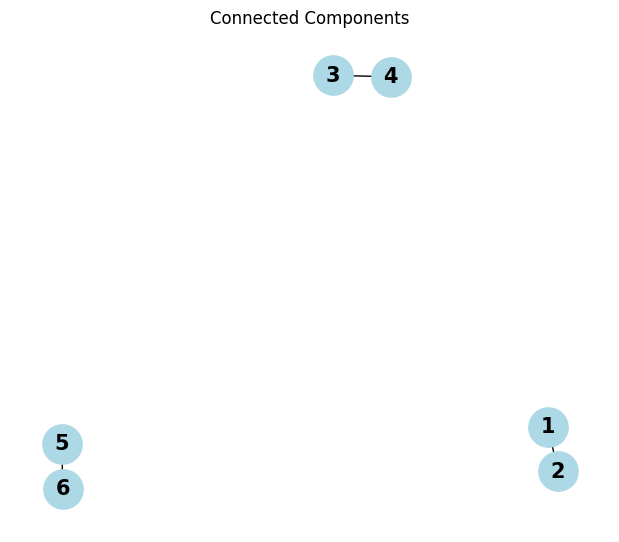

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G_connected_components = nx.Graph()
G_connected_components.add_edges_from([(1, 2), (3, 4), (5, 6)])

plt.figure(figsize=(6, 5))
nx.draw(G_connected_components, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Connected Components')
plt.show()


**Connected Graph**

- A connected graph is a graph in which there is a path between every pair of vertices.
- In a connected graph, there is exactly one connected component.

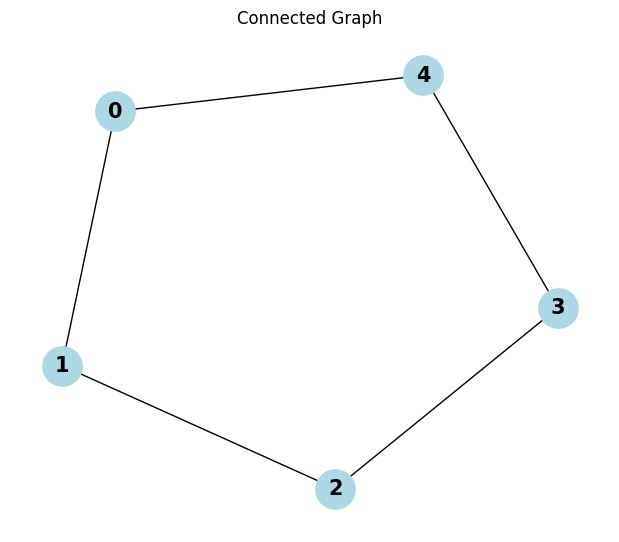

In [27]:
G_connected = nx.cycle_graph(5)

plt.figure(figsize=(6, 5))
nx.draw(G_connected, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Connected Graph')
plt.show()


**Eulerian Circuit**

- An Eulerian circuit is a circuit that visits every edge exactly once and returns to the starting vertex.
- This is possible only in graphs where every vertex has an even degree.

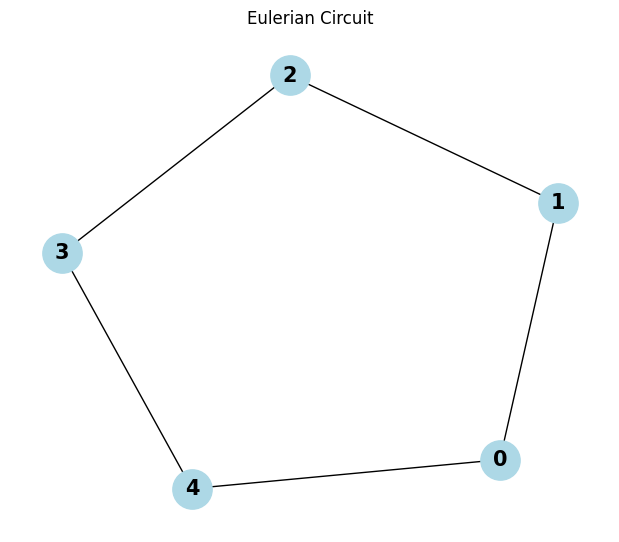

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

G_eulerian_circuit = nx.cycle_graph(5)

plt.figure(figsize=(6, 5))
nx.draw(G_eulerian_circuit, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Eulerian Circuit')
plt.show()


**Eulerian Trail**

- An Eulerian trail is a trail that visits every edge exactly once but may not necessarily return to the starting vertex.

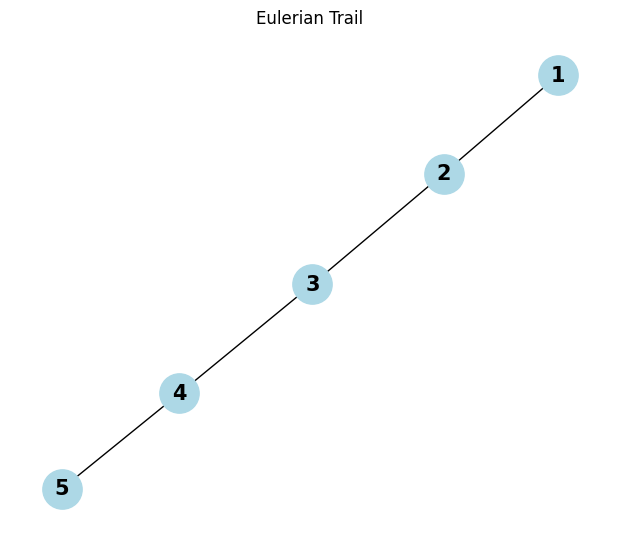

In [29]:
G_eulerian_trail = nx.Graph()
G_eulerian_trail.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

plt.figure(figsize=(6, 5))
nx.draw(G_eulerian_trail, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Eulerian Trail')
plt.show()


**Hamiltonian Circuit**

- A Hamiltonian circuit is a circuit that visits every vertex exactly once and returns to the starting vertex.
- Finding a Hamiltonian circuit is generally NP-complete and computationally expensive.

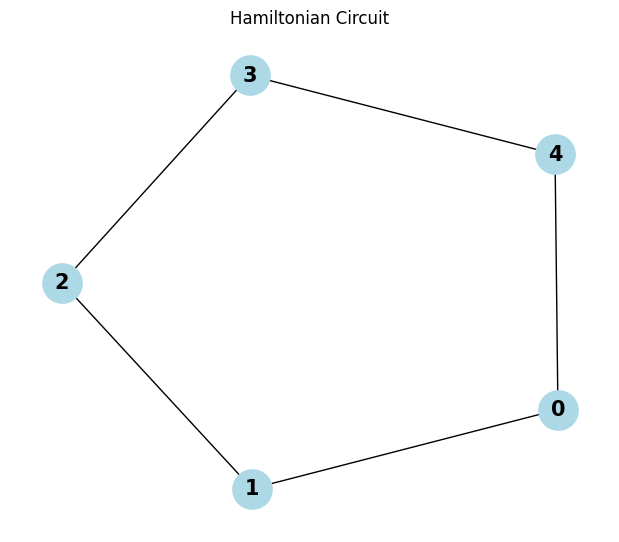

In [30]:
G_hamiltonian_circuit = nx.cycle_graph(5)

plt.figure(figsize=(6, 5))
nx.draw(G_hamiltonian_circuit, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Hamiltonian Circuit')
plt.show()


# Travelling Salesman Problem

**Travelling Salesman Problem (TSP)**

- The Travelling Salesman Problem is a classic optimization problem where the goal is to find the shortest possible tour that visits each city exactly once and returns to the original city.
- It's an NP-hard problem, meaning there is no known polynomial-time solution for large instances.

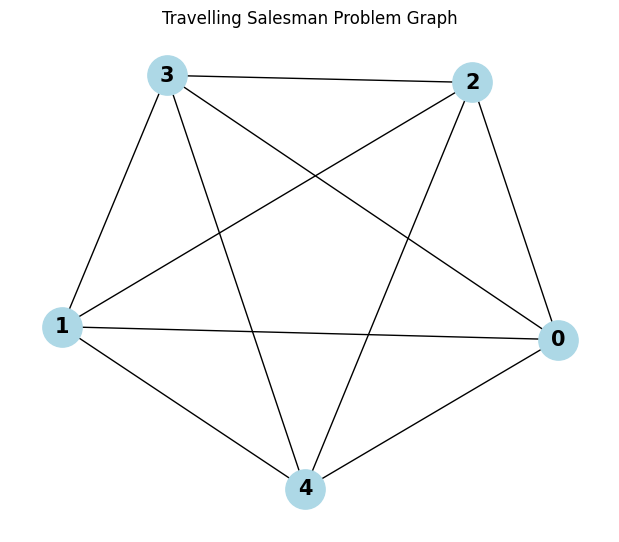

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

G_complete = nx.complete_graph(5)

plt.figure(figsize=(6, 5))
nx.draw(G_complete, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Travelling Salesman Problem Graph')
plt.show()


**Solution**

- The solution to the TSP is a sequence of vertices representing the order in which the salesman should visit the cities to minimize the total distance travelled.
- There are various algorithms to approximate the solution, including nearest neighbor, genetic algorithms, and integer linear programming.

Travelling Salesman Problem:
Given a complete graph representing cities and their distances, find the shortest possible tour
that visits each city exactly once and returns to the original city.



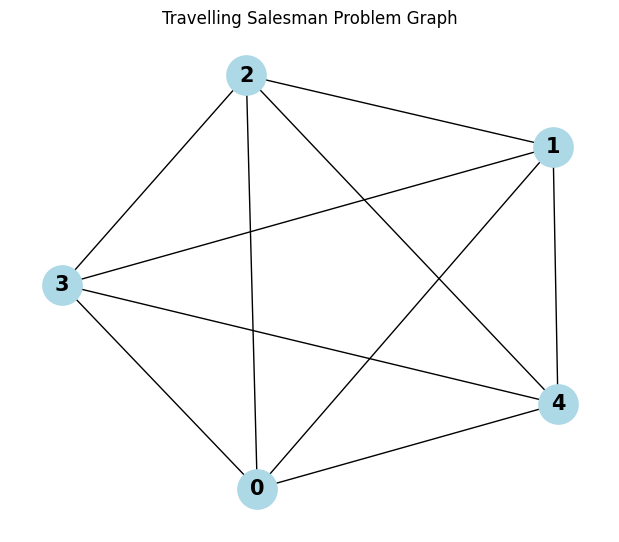

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

print("Travelling Salesman Problem:")
print("Given a complete graph representing cities and their distances, find the shortest possible tour")
print("that visits each city exactly once and returns to the original city.\n")


G_complete = nx.complete_graph(5)

plt.figure(figsize=(6, 5))
nx.draw(G_complete, with_labels=True, node_color='lightblue', node_size=800, font_size=15, font_weight='bold')
plt.title('Travelling Salesman Problem Graph')
plt.show()


tsp_solution = [0, 1, 2, 3, 4, 0] 
